# Metody eksploracji danych - laboratorium 2 zadanie 1

In [1]:
# Import libraries
import os
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Ładowanie danych

In [2]:
base_path = Path('data')
data_path = base_path / 'med_lab_2_zad_1.csv'

In [3]:
df = pd.read_csv(data_path)

## Spójrzmy na dane

In [11]:
df.head()

,Rok_studiów,Stan_cywilny
0,1,W
1,2,W
2,5,M
3,1,W
4,4,M


In [12]:
df.describe()

,Rok_studiów
count,27.000000
mean,3.037037
std,1.453946
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


## Rysowanie wykresów

<Axes: xlabel='Stan_cywilny', ylabel='Rok_studiów'>

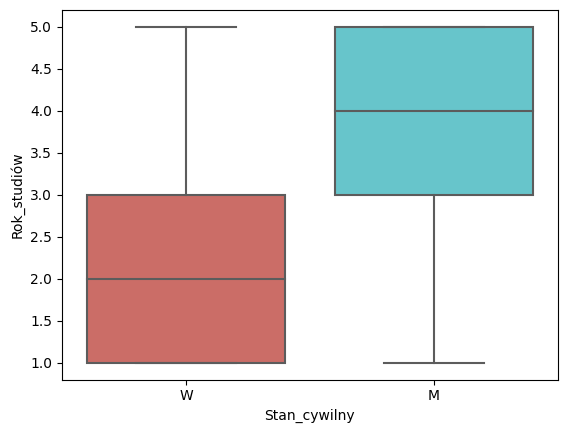

In [20]:
sns.boxplot(x='Stan_cywilny',
            y='Rok_studiów',
            data=df,
            palette='hls')

<Axes: xlabel='Stan_cywilny', ylabel='count'>

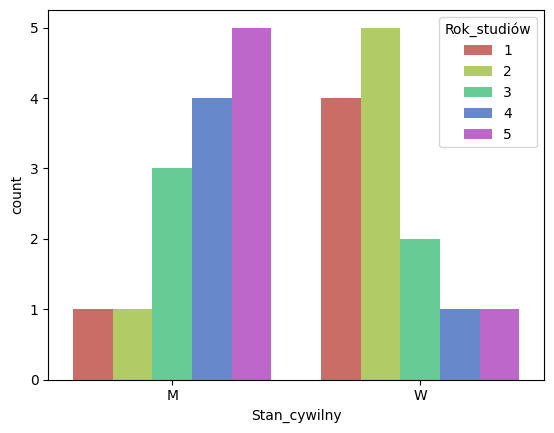

In [35]:
grouped_df = df.groupby(['Stan_cywilny', 'Rok_studiów']).size().reset_index(name='count')
sns.barplot(x='Stan_cywilny',
            y='count',
            hue='Rok_studiów',
            data=grouped_df,
            palette='hls')

In [34]:
grouped_df

,Stan_cywilny,Rok_studiów,count
0,M,1,1
1,M,2,1
2,M,3,3
3,M,4,4
4,M,5,5
5,W,1,4
6,W,2,5
7,W,3,2
8,W,4,1
9,W,5,1


## Przygotowanie danych

### Zamiana danych kategorycznych na numeryczne

In [4]:
df['Stan_cywilny'] = df['Stan_cywilny'].replace({'M': 0, 'W': 1})

In [46]:
df.head()

,Rok_studiów,Stan_cywilny
0,1,1
1,2,1
2,5,0
3,1,1
4,4,0


### Podział danych na zbiór treningowy i testowy

In [5]:
df_train = df.sample(frac=0.8, random_state=0)
df_test = df.drop(df_train.index)

## Trenowanie modelu

### Trenowanie modelu regresji linowej

In [6]:
from sklearn.linear_model import LinearRegression

### Podział danych na cechy i etykiety

In [7]:
X_train = df_train['Rok_studiów'].values.reshape(-1, 1)
y_train = df_train['Stan_cywilny']
X_test = df_test['Rok_studiów'].values.reshape(-1, 1)
y_test = df_test['Stan_cywilny']

In [8]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

LinearRegression()

### Testowanie modelu

In [9]:
y_pred = linear_regression.predict(X_test)

In [10]:
print('y_pred: ', y_pred)
print('y_test: ', y_test.values)

y_pred:  [0.79512195 0.79512195 0.79512195 0.32682927 0.17073171]
y_test:  [1 1 1 0 0]


### Przyjmując 0.5 jako próg

In [11]:
threshold = 0.5
y_pred = np.where(y_pred > threshold, 1, 0)

In [12]:
print('y_pred: ', y_pred)
print('df_test: ', df_test)

y_pred:  [1 1 1 0 0]
df_test:      Rok_studiów  Stan_cywilny
0             1             1
3             1             1
12            1             1
15            4             0
21            5             0


In [13]:
accuracy = np.sum(y_pred == y_test.values) / len(y_test)

In [14]:
print('accuracy: ', accuracy)

accuracy:  1.0


### Równania regresji liniowej

In [15]:
print(f'Linear regression equation: y = {linear_regression.coef_[0]:.2f}x + {linear_regression.intercept_:.2f}')

Linear regression equation: y = -0.16x + 0.95


### Wykres regresji liniowej

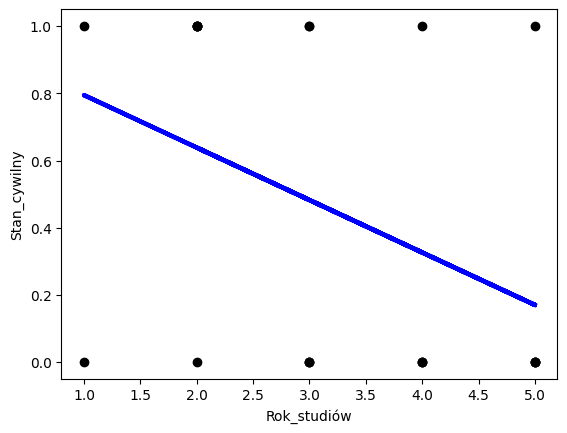

In [19]:
plt.scatter(X_train, y_train, color='black')
plt.plot(X_train, linear_regression.predict(X_train), color='blue', linewidth=3)
plt.xlabel('Rok_studiów')
plt.ylabel('Stan_cywilny')
plt.show()

## Trenowanie modelu regresji logistycznej

In [59]:
from sklearn.linear_model import LogisticRegression

In [66]:
X_train = df_train['Rok_studiów'].values.reshape(-1, 1)
y_train = df_train['Stan_cywilny'].values
X_test = df_test['Rok_studiów'].values.reshape(-1, 1)
y_test = df_test['Stan_cywilny'].values

In [67]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

LogisticRegression()

### Testowanie modelu

In [68]:
y_pred = logistic_regression.predict(X_test)

In [69]:
print('y_pred: ', y_pred)
print('y_test: ', y_test)

y_pred:  [1 1 1 0 0]
y_test:  [1 1 1 0 0]


In [70]:
accuracy = np.sum(y_pred == y_test) / len(y_test)

In [71]:
print('accuracy: ', accuracy)

accuracy:  1.0


### Równania regresji logistycznej

In [80]:
print(f"Intercept: {logistic_regression.intercept_[0]:.2f}")
print(f"Coefficients: {logistic_regression.coef_[0]}")

Intercept: 1.75
Coefficients: [-0.61638776]


## Wioski

Pomimo niewielkiej liczby próbek, obydwa modele poradziły sobie bardzo dobrze z tym zadaniem klasyfikacji binarnej. Jest to spowodowane tym, że dane są bardzo dobrze rozdzielone. W przypadku, gdyby dane były mniej rozdzielone, modele nie poradziłyby sobie tak dobrze.